In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_excel(r'D:\raw_data\每日业务数据20200601.xlsx')

In [3]:
df = df[df['日期']<'2020-06-01']

In [4]:
df = df[['日期','企业ID','受票方','建单金额','支付额']]

In [5]:
df2 = pd.read_excel('190301每天建单支付开票的项目.xlsx')

In [6]:
df2 = df2[['日期','企业ID','受票方','建单金额','支付额']]

In [7]:
df2 = df2[df2['日期']<'2019-11-01']

In [8]:
df3 = pd.concat([df2,df])

In [9]:
del df
del df2

In [10]:
df3['月份'] = df3['日期'].str[:7]

In [14]:
# df3['日期'] = df3['日期'].astype('datetime64')

In [15]:
# df3['星期'] = df3['日期'].dt.week
# df3['星期几'] = df3['日期'].dt.weekday

In [11]:
df3.dropna(subset=['受票方'],inplace=True)

In [12]:
df3.reset_index(drop=True,inplace=True)

In [191]:
df3.head()

,日期,企业ID,受票方,建单金额,支付额,月份
0,2019-03-01,3900,山西惠龙易通物流有限公司,0.00,18984.13,2019-03
1,2019-03-01,1543,乌鲁木齐世纪华程物流有限公司,32211.64,36495.23,2019-03
2,2019-03-01,3279,宁夏兴双惠物流有限公司,22671.00,71809.00,2019-03
3,2019-03-01,3343,湖南国联捷物流有限公司,40842.79,31223.68,2019-03
4,2019-03-01,6717,宁夏瑞福来工贸有限公司,14640.00,60310.00,2019-03


# 提取集团项目 id对应的45月建单金额

In [197]:
qyid_jdje = df3.pivot_table(index='企业ID',columns='月份',values='建单金额',aggfunc=np.sum,fill_value=0).reset_index()

In [201]:
qyid_jdje.columns = qyid_jdje.columns.values.tolist()

In [208]:
qyid_jdje = qyid_jdje[['企业ID','2020-04','2020-05']]

In [209]:
qyid_jdje.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   企业ID     5900 non-null   int64  
 1   2020-04  5900 non-null   float64
 2   2020-05  5900 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 138.4 KB


In [219]:
df_ty1 = pd.read_excel(r'C:\Users\芝麻\Downloads\A类福建项目明细.xlsx',sheet_name='Sheet1')

In [220]:
df_ty2 = pd.read_excel(r'C:\Users\芝麻\Downloads\A类福建项目明细.xlsx',sheet_name='Sheet2')

In [221]:
df_ty1['企业ID'] = df_ty1['企业ID'].astype('int')
df_ty2['企业ID'] = df_ty2['企业ID'].astype('int')

In [222]:
df_ty1 = pd.merge(df_ty1,qyid_jdje,how='left',on = '企业ID')
df_ty2 = pd.merge(df_ty2,qyid_jdje,how='left',on = '企业ID')

In [223]:
df_ty1.head()

,企业ID,企业名称,受票方名称,受票方所在省,受票方所在市,最近建单时间,2020-4,2020-5,4月建单金额,5月建单金额,2020-04,2020-05
0,8263000,厦门盛丰物流有限公司龙岩分公司,厦门盛丰物流有限公司,福建,厦门,2020/6/,38420,32840,NaN,NaN,40399.57,34532.08
1,8262432,盛丰物流集团有限公司莆田分公司,盛丰物流集团有限公司莆田分公司,福建,NaN,2020/6/,48265,39873,NaN,NaN,50751.80,41927.43
2,8262437,厦门盛丰物流有限公司漳州分公司,厦门盛丰物流有限公司漳州分公司,福建,NaN,2020/6/,11887,28361,NaN,NaN,12500.63,29824.41
3,8262438,福建盛丰物流集团长乐分公司,盛丰物流集团有限公司,福建,福州,2020/6/,1593896,1292655,NaN,NaN,1669899.79,1356363.01
4,8262444,厦门盛丰物流有限公司,厦门盛丰物流有限公司,福建,NaN,2020/6/,452254,652691,NaN,NaN,474467.18,690840.81


In [224]:
df_ty1.to_excel('061801.xlsx',index=False)
df_ty2.to_excel('061802.xlsx',index=False)

In [13]:
# 受票方累计支付金额
spf_zf = df3.groupby('受票方')['支付额'].sum()
spf_zf_df = pd.DataFrame({'受票方':spf_zf.index,'总支付额':spf_zf.values})

In [14]:
# 筛选累计支付额大于0的受票方
spf_zf_df = spf_zf_df[spf_zf_df['总支付额']>0]

In [15]:
# 去除测试和异常受票方
spf_zf_df = spf_zf_df[~(spf_zf_df['受票方'].str.contains('测试') | spf_zf_df['受票方'].str.contains('spf'))]

In [16]:
spf_zf_df

,受票方,总支付额
9,七台河市速达快递有限公司,1245924.68
10,万里扬州物流有限公司,36170.22
11,三分之三供应链管理(上海)有限公司,15762.95
12,三明鑫旭达物流有限公司,69671.39
13,三门峡中基物流有限公司,25227476.23
...,...,...
4684,黑龙江顺航物流运输有限公司,17414324.26
4685,黑龙江龙运快运有限公司,8324057.90
4687,齐齐哈尔森峰快递有限公司,626455.00
4688,齐齐哈尔链传动有限公司,426519.84


In [17]:
#  获取受票方每天的建单额
spf_rjd = df3.pivot_table(index='受票方',columns='日期',values='建单金额',aggfunc=np.sum,fill_value=0)

In [18]:
# 合并 得到有支付记录的受票方日建单
res = pd.merge(spf_zf_df,spf_rjd,how='left',on='受票方')

In [19]:
df4 = pd.read_excel(r'C:\Users\芝麻\Desktop\项目属性20200605.xlsx',dtype={'开户时间':'datetime64','首次建单时间':'datetime64',
                                                                    '末次建单时间':'datetime64','首次支付时间':'datetime64','末次支付时间':'datetime64'})

In [20]:
df4.sort_values(['受票方名称','首次建单时间'],inplace=True)

In [21]:
df4.dropna(subset=['受票方名称'],inplace=True)

In [144]:
spf_sczf = df4.groupby('受票方名称',as_index=False).agg({'首次建单时间':'min','首次支付时间':'min'})

In [145]:
# 筛选首次支付时间在201903-202003的受票方
spf_sczf = spf_sczf[(spf_sczf['首次建单时间']>='2019-03-01')& (spf_sczf['首次建单时间']<'2020-02-01')]

In [147]:
spf_sczf.reset_index(drop=True,inplace=True)

In [148]:
spf_sczf.columns = ['受票方','首次建单时间','首次支付时间']

In [165]:
spf = pd.merge(res,spf_sczf,how='inner',on='受票方')

In [166]:
spf['首次建单日期'] = spf['首次建单时间'].dt.date

In [167]:
spf['首次支付日期'] = spf['首次支付时间'].dt.date

In [171]:
spf['建单周几'] = spf['首次建单时间'].dt.weekday

In [169]:
spf['支付周几'] = spf['首次支付时间'].dt.weekday

In [172]:
spf

,受票方,总支付额,2019-03-01,2019-03-02,2019-03-03,2019-03-04,2019-03-05,2019-03-06,2019-03-07,2019-03-08,2019-03-09,2019-03-10,2019-03-11,2019-03-12,2019-03-13,2019-03-14,2019-03-15,2019-03-16,2019-03-17,2019-03-18,2019-03-19,2019-03-20,2019-03-21,2019-03-22,2019-03-23,2019-03-24,2019-03-25,2019-03-26,2019-03-27,2019-03-28,2019-03-29,2019-03-30,2019-03-31,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06,2019-04-07,2019-04-08,2019-04-09,2019-04-10,2019-04-11,2019-04-12,2019-04-13,2019-04-14,2019-04-15,2019-04-16,2019-04-17,2019-04-18,2019-04-19,2019-04-20,2019-04-21,2019-04-22,2019-04-23,2019-04-24,2019-04-25,2019-04-26,2019-04-27,2019-04-28,2019-04-29,2019-04-30,2019-05-01,2019-05-02,2019-05-03,2019-05-04,2019-05-05,2019-05-06,2019-05-07,2019-05-08,2019-05-09,2019-05-10,2019-05-11,2019-05-12,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-18,2019-05-19,2019-05-20,2019-05-21,2019-05-22,2019-05-23,2019-05-24,2019-05-25,2019-05-26,2019-05-27,2019-05-28,2019-05-29,2019-05-30,2019-05-31,2019-06-01,2019-06-02,2019-06-03,2019-06-04,2019-06-05,2019-06-06,2019-06-07,2019-06-08,2019-06-09,2019-06-10,2019-06-11,2019-06-12,2019-06-13,2019-06-14,2019-06-15,2019-06-16,2019-06-17,2019-06-18,2019-06-19,2019-06-20,2019-06-21,2019-06-22,2019-06-23,2019-06-24,2019-06-25,2019-06-26,2019-06-27,2019-06-28,2019-06-29,2019-06-30,2019-07-01,2019-07-02,2019-07-03,2019-07-04,2019-07-05,2019-07-06,2019-07-07,2019-07-08,2019-07-09,2019-07-10,2019-07-11,2019-07-12,2019-07-13,2019-07-14,2019-07-15,2019-07-16,2019-07-17,2019-07-18,2019-07-19,2019-07-20,2019-07-21,2019-07-22,2019-07-23,2019-07-24,2019-07-25,2019-07-26,2019-07-27,2019-07-28,2019-07-29,2019-07-30,2019-07-31,2019-08-01,2019-08-02,2019-08-03,2019-08-04,2019-08-05,2019-08-06,2019-08-07,2019-08-08,2019-08-09,2019-08-10,2019-08-11,2019-08-12,2019-08-13,2019-08-14,2019-08-15,2019-08-16,2019-08-17,2019-08-18,2019-08-19,2019-08-20,2019-08-21,2019-08-22,2019-08-23,2019-08-24,2019-08-25,2019-08-26,2019-08-27,2019-08-28,2019-08-29,2019-08-30,2019-08-31,2019-09-01,2019-09-02,2019-09-03,2019-09-04,2019-09-05,2019-09-06,2019-09-07,2019-09-08,2019-09-09,2019-09-10,2019-09-11,2019-09-12,2019-09-13,2019-09-14,2019-09-15,2019-09-16,2019-09-17,2019-09-18,2019-09-19,2019-09-20,2019-09-21,2019-09-22,2019-09-23,2019-09-24,2019-09-25,2019-09-26,2019-09-27,2019-09-28,2019-09-29,2019-09-30,2019-10-01,2019-10-02,2019-10-03,2019-10-04,2019-10-05,2019-10-06,2019-10-07,2019-10-08,2019-10-09,2019-10-10,2019-10-11,2019-10-12,2019-10-13,2019-10-14,2019-10-15,2019-10-16,2019-10-17,2019-10-18,2019-10-19,2019-10-20,2019-10-21,2019-10-22,2019-10-23,2019-10-24,2019-10-25,2019-10-26,2019-10-27,2019-10-28,2019-10-29,2019-10-30,2019-10-31,2019-11-01,2019-11-02,2019-11-03,2019-11-04,2019-11-05,2019-11-06,2019-11-07,2019-11-08,2019-11-09,2019-11-10,2019-11-11,2019-11-12,2019-11-13,2019-11-14,2019-11-15,2019-11-16,2019-11-17,2019-11-18,2019-11-19,2019-11-20,2019-11-21,2019-11-22,2019-11-23,2019-11-24,2019-11-25,2019-11-26,2019-11-27,2019-11-28,2019-11-29,2019-11-30,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13,2019-12-14,2019-12-15,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-21,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-

In [35]:
# col = ['day'+str(i) for i in range(90)]
# x = []
# for i in range(len(spf)):
#     a = spf.iloc[i:i+1,column.index(spf['首次支付日期'][i].strftime('%Y-%m-%d')):column.index(spf['首次支付日期'][i].strftime('%Y-%m-%d'))+90]
#     a.columns = col
#     x.append(a)
# y = pd.concat(x).
# spf_sx = pd.concat([spf,y],axis=1)

In [36]:
# spf_sx['5月建单'] = spf_sx.iloc[:,430:461].sum(axis=1)

In [37]:
# week = ['week'+str(i) for i in range(1,66,1)]
# +'to'+spf.columns[i*7+12]

In [173]:
data = spf[['受票方','首次建单日期','首次支付日期','建单周几','支付周几']].copy()

In [174]:
data

,受票方,首次建单日期,首次支付日期,建单周几,支付周几
0,七台河市速达快递有限公司,2019-05-20,2019-05-23,0,3
1,万里扬州物流有限公司,2019-05-30,2019-06-12,3,2
2,三明鑫旭达物流有限公司,2019-11-13,2019-11-22,2,4
3,三门峡伟盈矿产品购销有限公司,2019-09-03,2019-09-09,1,0
4,三门峡市兆成物资贸易有限公司,2019-08-28,2019-08-30,2,4
...,...,...,...,...,...
1639,黑龙江诚信运输有限公司,2019-08-29,2019-10-23,3,2
1640,黑龙江诚和运物流有限公司,2019-08-16,2019-08-31,4,5
1641,黑龙江顺航物流运输有限公司,2019-05-28,2019-06-05,1,2
1642,黑龙江龙运快运有限公司,2019-12-18,2020-01-13,2,0


In [175]:
for i in range(65):
    data[spf.columns[i*7+6]] = spf.iloc[:,i*7+6:i*7+13].sum(axis=1)

In [176]:
data.head()

,受票方,首次建单日期,首次支付日期,建单周几,支付周几,2019-03-05,2019-03-12,2019-03-19,2019-03-26,2019-04-02,2019-04-09,2019-04-16,2019-04-23,2019-04-30,2019-05-07,2019-05-14,2019-05-21,2019-05-28,2019-06-04,2019-06-11,2019-06-18,2019-06-25,2019-07-02,2019-07-09,2019-07-16,2019-07-23,2019-07-30,2019-08-06,2019-08-13,2019-08-20,2019-08-27,2019-09-03,2019-09-10,2019-09-17,2019-09-24,2019-10-01,2019-10-08,2019-10-15,2019-10-22,2019-10-29,2019-11-05,2019-11-12,2019-11-19,2019-11-26,2019-12-03,2019-12-10,2019-12-17,2019-12-24,2019-12-31,2020-01-07,2020-01-14,2020-01-21,2020-01-28,2020-02-04,2020-02-11,2020-02-18,2020-02-25,2020-03-03,2020-03-10,2020-03-17,2020-03-24,2020-03-31,2020-04-07,2020-04-14,2020-04-21,2020-04-28,2020-05-05,2020-05-12,2020-05-19,2020-05-26
0,七台河市速达快递有限公司,2019-05-20,2019-05-23,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8888.88,57777.72,57777.72,39999.96,48888.84,53333.28,35555.52,53333.28,53333.28,53333.28,0.00,53333.28,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,8888.88,44444.4,4867.72,48253.92,0.0,73015.80,34074.04,38941.76,38941.76,97354.40,58412.64,58412.64,58412.64,58412.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29206.32,38941.76,19470.88,77883.52,82751.24,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00
1,万里扬州物流有限公司,2019-05-30,2019-06-12,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,4255.32,9680.85,10744.68,6595.75,0.00,2340.43,0.00,2446.81,106.38,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00
2,三明鑫旭达物流有限公司,2019-11-13,2019-11-22,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,10604.46,4135.74,6362.69,3181.35,3181.35,4878.05,1802.76,6362.68,8377.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,4878.06,2120.9,3181.35,9544.05,8695.67,2120.9,5090.15
3,三门峡伟盈矿产品购销有限公司,2019-09-03,2019-09-09,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,161933.76,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00
4,三门峡市兆成物资贸易有限公司,2019-08-28,2019-08-30,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,20529.11,806963.03,2695936.53,2867788.33,347724.87,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00


In [179]:
data['首次建单周'] = 'sc'

In [182]:
for i in range(64):
    data.loc[(data[data.columns[i+5]]>0) & (data['首次建单周'] == 'sc'),'首次建单周']=data.columns[i+5]

In [183]:
data

,受票方,首次建单日期,首次支付日期,建单周几,支付周几,2019-03-05,2019-03-12,2019-03-19,2019-03-26,2019-04-02,2019-04-09,2019-04-16,2019-04-23,2019-04-30,2019-05-07,2019-05-14,2019-05-21,2019-05-28,2019-06-04,2019-06-11,2019-06-18,2019-06-25,2019-07-02,2019-07-09,2019-07-16,2019-07-23,2019-07-30,2019-08-06,2019-08-13,2019-08-20,2019-08-27,2019-09-03,2019-09-10,2019-09-17,2019-09-24,2019-10-01,2019-10-08,2019-10-15,2019-10-22,2019-10-29,2019-11-05,2019-11-12,2019-11-19,2019-11-26,2019-12-03,2019-12-10,2019-12-17,2019-12-24,2019-12-31,2020-01-07,2020-01-14,2020-01-21,2020-01-28,2020-02-04,2020-02-11,2020-02-18,2020-02-25,2020-03-03,2020-03-10,2020-03-17,2020-03-24,2020-03-31,2020-04-07,2020-04-14,2020-04-21,2020-04-28,2020-05-05,2020-05-12,2020-05-19,2020-05-26,首次建单周
0,七台河市速达快递有限公司,2019-05-20,2019-05-23,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8888.88,57777.72,57777.72,39999.96,48888.84,53333.28,35555.52,53333.28,53333.28,53333.28,0.00,53333.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8888.88,44444.40,4867.72,48253.92,0.00,73015.80,34074.04,38941.76,38941.76,97354.40,58412.64,58412.64,58412.64,58412.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29206.32,38941.76,19470.88,77883.52,82751.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-05-14
1,万里扬州物流有限公司,2019-05-30,2019-06-12,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,4255.32,9680.85,10744.68,6595.75,0.00,2340.43,0.00,2446.81,106.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-05-28
2,三明鑫旭达物流有限公司,2019-11-13,2019-11-22,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10604.46,4135.74,6362.69,3181.35,3181.35,4878.05,1802.76,6362.68,8377.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4878.06,2120.90,3181.35,9544.05,8695.67,2120.90,5090.15,2019-11-12
3,三门峡伟盈矿产品购销有限公司,2019-09-03,2019-09-09,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,161933.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-09-03
4,三门峡市兆成物资贸易有限公司,2019-08-28,2019-08-30,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20529.11,806963.03,2695936.53,2867788.33,347724.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-08-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,黑龙江诚信运输有限公司,2019-08-29,2019-10-23,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,105.82,0.00,0.00,0.00,9211.64,0.00,378204.36,595797.54,1261991.55,859035.36,825863.54,780933.39,614606.37,604112.17,768462.47,633789.40,540510.05,411521.69,714843.39,653033.85,309549.22,166879.96,101568.79,142579.89,254980.96,92023.28,31569.31,122644.44,62107.95,41351.33,47850.80,130367.21,757686.75,688212.68,326831.24,391215.90,632415.91,665513.80,496890.01,50.88,2019-08-27
1640,黑龙江诚和运物流有限公司,2019-08-16,2019-08-31,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,115343.91,111111.12,275132.25,211640.20,467724.85,0.00,101587.29,101587.29,0.00,546031.77,0.00,221164.03,111111.12,111111.12,580952.38,564021.16,548148.17,262433.88,513227.54,661375.69,133333.34,142857.15,0.00,0.00,0.00,0.00,0.

In [190]:
data2 = data[data['首次建单周']!='sc'].copy()

In [246]:
def zzt(x):
    zt = None
    if x[:3].sum()==0:
        if x[3]==0:
            zt = '流失'
        else:
            zt = '正常'
    else:
        if x[3]/x[:3].mean() >= 0.3:
            zt = '正常'
        else:
            zt = '预警'
    return zt

In [247]:
zzt(data2[data2.columns[5:9]].values[0])

'流失'

In [248]:
for i in range(62):
    data2[data2.columns[i+8]+'状态'] = data2[data2.columns[i+5:i+9]].apply(zzt,axis=1)

In [249]:
data2.head()

,受票方,首次建单日期,首次支付日期,建单周几,支付周几,2019-03-05,2019-03-12,2019-03-19,2019-03-26,2019-04-02,2019-04-09,2019-04-16,2019-04-23,2019-04-30,2019-05-07,2019-05-14,2019-05-21,2019-05-28,2019-06-04,2019-06-11,2019-06-18,2019-06-25,2019-07-02,2019-07-09,2019-07-16,2019-07-23,2019-07-30,2019-08-06,2019-08-13,2019-08-20,2019-08-27,2019-09-03,2019-09-10,2019-09-17,2019-09-24,2019-10-01,2019-10-08,2019-10-15,2019-10-22,2019-10-29,2019-11-05,2019-11-12,2019-11-19,2019-11-26,2019-12-03,2019-12-10,2019-12-17,2019-12-24,2019-12-31,2020-01-07,2020-01-14,2020-01-21,2020-01-28,2020-02-04,2020-02-11,2020-02-18,2020-02-25,2020-03-03,2020-03-10,2020-03-17,2020-03-24,2020-03-31,2020-04-07,2020-04-14,2020-04-21,2020-04-28,2020-05-05,2020-05-12,2020-05-19,2020-05-26,首次建单周,2019-03-26状态,2019-04-02状态,2019-04-09状态,2019-04-16状态,2019-04-23状态,2019-04-30状态,2019-05-07状态,2019-05-14状态,2019-05-21状态,2019-05-28状态,2019-06-04状态,2019-06-11状态,2019-06-18状态,2019-06-25状态,2019-07-02状态,2019-07-09状态,2019-07-16状态,2019-07-23状态,2019-07-30状态,2019-08-06状态,2019-08-13状态,2019-08-20状态,2019-08-27状态,2019-09-03状态,2019-09-10状态,2019-09-17状态,2019-09-24状态,2019-10-01状态,2019-10-08状态,2019-10-15状态,2019-10-22状态,2019-10-29状态,2019-11-05状态,2019-11-12状态,2019-11-19状态,2019-11-26状态,2019-12-03状态,2019-12-10状态,2019-12-17状态,2019-12-24状态,2019-12-31状态,2020-01-07状态,2020-01-14状态,2020-01-21状态,2020-01-28状态,2020-02-04状态,2020-02-11状态,2020-02-18状态,2020-02-25状态,2020-03-03状态,2020-03-10状态,2020-03-17状态,2020-03-24状态,2020-03-31状态,2020-04-07状态,2020-04-14状态,2020-04-21状态,2020-04-28状态,2020-05-05状态,2020-05-12状态,2020-05-19状态,2020-05-26状态
0,七台河市速达快递有限公司,2019-05-20,2019-05-23,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8888.88,57777.72,57777.72,39999.96,48888.84,53333.28,35555.52,53333.28,53333.28,53333.28,0.00,53333.28,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,8888.88,44444.4,4867.72,48253.92,0.0,73015.80,34074.04,38941.76,38941.76,97354.40,58412.64,58412.64,58412.64,58412.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29206.32,38941.76,19470.88,77883.52,82751.24,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,2019-05-14,流失,流失,流失,流失,流失,流失,流失,正常,正常,正常,正常,正常,正常,正常,正常,正常,正常,预警,正常,预警,预警,预警,流失,流失,流失,流失,流失,流失,正常,正常,预警,正常,预警,正常,正常,正常,正常,正常,正常,正常,正常,正常,预警,预警,预警,流失,流失,流失,流失,正常,正常,正常,正常,正常,预警,预警,预警,流失,流失,流失,流失,流失
1,万里扬州物流有限公司,2019-05-30,2019-06-12,3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,4255.32,9680.85,10744.68,6595.75,0.00,2340.43,0.00,2446.81,106.38,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,2019-05-28,流失,流失,流失,流失,流失,流失,流失,流失,流失,正常,正常,正常,正常,预警,正常,预警,正常,预警,预警,预警,预警,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失
2,三明鑫旭达物流有限公司,2019-11-13,2019-11-22,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,10604.46,4135.74,6362.69,3181.35,3181.35,4878.05,1802.76,6362.68,8377.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,4878.06,2120.9,3181.35,9544.05,8695.67,2120.9,5090.15,2019-11-12,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,正常,正常,正常,正常,正常,正常,正常,正常,正常,预警,预警,预警,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,正常,正常,正常,正常,正常,预警,正常
3,三门峡伟盈矿产品购销有限公司,2019-09-03,2019-09-09,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,161933.76,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,2019-09-03,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,正常,预警,预警,预警,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失
4,三门峡市兆成物资贸易有限公司,2019-08-28,2019-08-30,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0

NameError: name 'data2' is not defined

In [250]:
# data2.to_excel('客户周建单状态.xlsx',index=False)

In [254]:
data2.columns[71]

'2019-03-26状态'

In [31]:
import datetime

In [32]:
def zy(x):
    r = x[0]+datetime.timedelta(days=(7-x[1]))
    return r

In [33]:
data['首次支付后周一'] = pd.Series([data['首次支付日期'].values[i]+datetime.timedelta(days=int(7-data['weekday'].values[i])) for i in range(len(data))])

In [89]:
data

,受票方,首次支付日期,weekday,2019-03-04,2019-03-11,2019-03-18,2019-03-25,2019-04-01,2019-04-08,2019-04-15,2019-04-22,2019-04-29,2019-05-06,2019-05-13,2019-05-20,2019-05-27,2019-06-03,2019-06-10,2019-06-17,2019-06-24,2019-07-01,2019-07-08,2019-07-15,2019-07-22,2019-07-29,2019-08-05,2019-08-12,2019-08-19,2019-08-26,2019-09-02,2019-09-09,2019-09-16,2019-09-23,2019-09-30,2019-10-07,2019-10-14,2019-10-21,2019-10-28,2019-11-04,2019-11-11,2019-11-18,2019-11-25,2019-12-02,2019-12-09,2019-12-16,2019-12-23,2019-12-30,2020-01-06,2020-01-13,2020-01-20,2020-01-27,2020-02-03,2020-02-10,2020-02-17,2020-02-24,2020-03-02,2020-03-09,2020-03-16,2020-03-23,2020-03-30,2020-04-06,2020-04-13,2020-04-20,2020-04-27,2020-05-04,2020-05-11,2020-05-18,2020-05-25,首次支付后周一
0,七台河市速达快递有限公司,2019-05-23,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57777.72,62222.16,35555.52,53333.28,57777.72,26666.64,44444.40,53333.28,44444.40,26666.64,53333.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8888.88,44444.40,4867.72,48253.92,0.00,73015.80,9735.44,63280.36,38941.76,77883.52,68148.08,68148.08,38941.76,77883.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29206.32,0.00,58412.64,77883.52,82751.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-05-27
1,万里扬州物流有限公司,2019-06-12,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2553.19,8936.17,5319.15,14468.09,0.00,2340.43,0.00,2446.81,106.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-06-17
2,三明鑫旭达物流有限公司,2019-11-22,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8483.57,6256.63,5302.24,3181.35,4241.80,3817.60,2863.21,6362.68,6256.63,2120.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2120.90,4878.06,1060.45,9544.05,9756.12,3181.35,5090.15,2019-11-25
3,三门峡伟盈矿产品购销有限公司,2019-09-09,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,141817.36,20116.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-09-16
4,三门峡市兆成物资贸易有限公司,2019-08-30,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13587.31,413693.16,2546751.34,3287470.90,477439.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-09-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,黑龙江诚信运输有限公司,2019-10-23,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,105.82,0.00,0.00,0.00,9211.64,0.00,284109.01,579863.28,1158192.58,941332.72,893390.53,693787.36,707256.10,575120.65,738680.45,662043.37,565641.26,413557.67,694063.51,673830.65,359982.03,153883.35,125968.58,101505.82,254970.37,129668.79,19749.20,114259.25,80069.86,37361.91,54803.18,85833.88,676406.33,715350.25,387043.92,388005.33,505959.81,809839.73,523406.41,58.30,2019-10-28
1752,黑龙江诚和运物流有限公司,2019-08-31,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,80423.28,146031.75,275132.25,211640.20,352380.94,115343.91,101587.29,0.00,101587.29,434920.65,111111.12,33862.43,298412.72,111111.12,494179.90,650793.64,437037.05,373545.00,493121.72,507936.53,306878.32,142857.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110052.92,91005.29,406349.19,95238.09,492063.48,285714.29,644444.41,1283597.84,1211640.18,

In [34]:
column = list(data.columns)
col = ['week'+str(i) for i in range(13)]
x = []
for i in range(len(data)):
    a = data.iloc[i:i+1,column.index(data['首次支付后周一'][i].strftime('%Y-%m-%d')):column.index(data['首次支付后周一'][i].strftime('%Y-%m-%d'))+13]
    a.columns = col
    x.append(a)
y = pd.concat(x)
data_x = pd.concat([data,y],axis=1)

In [36]:
data_x.shape

(1756, 82)

In [37]:
data_x.columns[69]

'week0'

In [60]:
data_x['上线12周为0次数'] = (data_x[data_x.columns[69:81]]==0).sum(axis=1)

In [67]:
data_x

,受票方,首次支付日期,weekday,2019-03-04,2019-03-11,2019-03-18,2019-03-25,2019-04-01,2019-04-08,2019-04-15,2019-04-22,2019-04-29,2019-05-06,2019-05-13,2019-05-20,2019-05-27,2019-06-03,2019-06-10,2019-06-17,2019-06-24,2019-07-01,2019-07-08,2019-07-15,2019-07-22,2019-07-29,2019-08-05,2019-08-12,2019-08-19,2019-08-26,2019-09-02,2019-09-09,2019-09-16,2019-09-23,2019-09-30,2019-10-07,2019-10-14,2019-10-21,2019-10-28,2019-11-04,2019-11-11,2019-11-18,2019-11-25,2019-12-02,2019-12-09,2019-12-16,2019-12-23,2019-12-30,2020-01-06,2020-01-13,2020-01-20,2020-01-27,2020-02-03,2020-02-10,2020-02-17,2020-02-24,2020-03-02,2020-03-09,2020-03-16,2020-03-23,2020-03-30,2020-04-06,2020-04-13,2020-04-20,2020-04-27,2020-05-04,2020-05-11,2020-05-18,2020-05-25,首次支付后周一,week0,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,上线12周为0次数
0,七台河市速达快递有限公司,2019-05-23,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57777.72,62222.16,35555.52,53333.28,57777.72,26666.64,44444.40,53333.28,44444.40,26666.64,53333.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8888.88,44444.40,4867.72,48253.92,0.00,73015.80,9735.44,63280.36,38941.76,77883.52,68148.08,68148.08,38941.76,77883.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29206.32,0.00,58412.64,77883.52,82751.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-05-27,62222.16,35555.52,53333.28,57777.72,26666.64,44444.40,53333.28,44444.40,26666.64,53333.28,0.00,0.00,0.00,2
1,万里扬州物流有限公司,2019-06-12,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2553.19,8936.17,5319.15,14468.09,0.00,2340.43,0.00,2446.81,106.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-06-17,14468.09,0.00,2340.43,0.00,2446.81,106.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8
2,三明鑫旭达物流有限公司,2019-11-22,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8483.57,6256.63,5302.24,3181.35,4241.80,3817.60,2863.21,6362.68,6256.63,2120.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2120.90,4878.06,1060.45,9544.05,9756.12,3181.35,5090.15,2019-11-25,5302.24,3181.35,4241.80,3817.60,2863.21,6362.68,6256.63,2120.89,0.00,0.00,0.00,0.00,0.00,4
3,三门峡伟盈矿产品购销有限公司,2019-09-09,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,141817.36,20116.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-09-16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12
4,三门峡市兆成物资贸易有限公司,2019-08-30,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13587.31,413693.16,2546751.34,3287470.90,477439.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-09-02,413693.16,2546751.34,3287470.90,477439.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,黑龙江诚信运输有限公司,2019-10-23,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,105.82,0.00,0.00,0.00,9211.64,0.00,284109.01,579863.28,1158192.58,941332.72,893390.53,693787.36,707256.10,575120.65,738680.45,662043.37,565641.26,413557.67,694063.51,673830.65,359982.03,153883.35,125968.58,101505.82,254970.37,129668.79,19749.20,114259.25,80069.86,37361.

In [68]:
data_x['0周占比'] = data_x['上线12周为0次数']/12

In [69]:
data_x

,受票方,首次支付日期,weekday,2019-03-04,2019-03-11,2019-03-18,2019-03-25,2019-04-01,2019-04-08,2019-04-15,2019-04-22,2019-04-29,2019-05-06,2019-05-13,2019-05-20,2019-05-27,2019-06-03,2019-06-10,2019-06-17,2019-06-24,2019-07-01,2019-07-08,2019-07-15,2019-07-22,2019-07-29,2019-08-05,2019-08-12,2019-08-19,2019-08-26,2019-09-02,2019-09-09,2019-09-16,2019-09-23,2019-09-30,2019-10-07,2019-10-14,2019-10-21,2019-10-28,2019-11-04,2019-11-11,2019-11-18,2019-11-25,2019-12-02,2019-12-09,2019-12-16,2019-12-23,2019-12-30,2020-01-06,2020-01-13,2020-01-20,2020-01-27,2020-02-03,2020-02-10,2020-02-17,2020-02-24,2020-03-02,2020-03-09,2020-03-16,2020-03-23,2020-03-30,2020-04-06,2020-04-13,2020-04-20,2020-04-27,2020-05-04,2020-05-11,2020-05-18,2020-05-25,首次支付后周一,week0,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,上线12周为0次数,0周占比
0,七台河市速达快递有限公司,2019-05-23,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57777.72,62222.16,35555.52,53333.28,57777.72,26666.64,44444.40,53333.28,44444.40,26666.64,53333.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8888.88,44444.40,4867.72,48253.92,0.00,73015.80,9735.44,63280.36,38941.76,77883.52,68148.08,68148.08,38941.76,77883.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29206.32,0.00,58412.64,77883.52,82751.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-05-27,62222.16,35555.52,53333.28,57777.72,26666.64,44444.40,53333.28,44444.40,26666.64,53333.28,0.00,0.00,0.00,2,0.166667
1,万里扬州物流有限公司,2019-06-12,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2553.19,8936.17,5319.15,14468.09,0.00,2340.43,0.00,2446.81,106.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-06-17,14468.09,0.00,2340.43,0.00,2446.81,106.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8,0.666667
2,三明鑫旭达物流有限公司,2019-11-22,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8483.57,6256.63,5302.24,3181.35,4241.80,3817.60,2863.21,6362.68,6256.63,2120.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2120.90,4878.06,1060.45,9544.05,9756.12,3181.35,5090.15,2019-11-25,5302.24,3181.35,4241.80,3817.60,2863.21,6362.68,6256.63,2120.89,0.00,0.00,0.00,0.00,0.00,4,0.333333
3,三门峡伟盈矿产品购销有限公司,2019-09-09,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,141817.36,20116.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-09-16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12,1.000000
4,三门峡市兆成物资贸易有限公司,2019-08-30,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13587.31,413693.16,2546751.34,3287470.90,477439.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-09-02,413693.16,2546751.34,3287470.90,477439.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,黑龙江诚信运输有限公司,2019-10-23,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,105.82,0.00,0.00,0.00,9211.64,0.00,284109.01,579863.28,1158192.58,941332.72,893390.53,693787.36,707256.10,575120.65,738680.45,662043.37,565641.26,413557.67,694063.51,673830.65,359982.03,153883.35,125968.58,101505.82,

In [70]:
data_x['0周占比'].describe()

count    1756.000000
mean        0.420368
std         0.362268
min         0.000000
25%         0.000000
50%         0.416667
75%         0.750000
max         1.000000
Name: 0周占比, dtype: float64

In [77]:
data_x['开始预警周'] = 'begin'

In [85]:
data_x.columns[80]

'week11'

In [92]:
data_x.loc[(data_x['week11']==0) & (data_x['week10']>0) & (data_x['开始预警周']=='begin')]

,受票方,首次支付日期,weekday,2019-03-04,2019-03-11,2019-03-18,2019-03-25,2019-04-01,2019-04-08,2019-04-15,2019-04-22,2019-04-29,2019-05-06,2019-05-13,2019-05-20,2019-05-27,2019-06-03,2019-06-10,2019-06-17,2019-06-24,2019-07-01,2019-07-08,2019-07-15,2019-07-22,2019-07-29,2019-08-05,2019-08-12,2019-08-19,2019-08-26,2019-09-02,2019-09-09,2019-09-16,2019-09-23,2019-09-30,2019-10-07,2019-10-14,2019-10-21,2019-10-28,2019-11-04,2019-11-11,2019-11-18,2019-11-25,2019-12-02,2019-12-09,2019-12-16,2019-12-23,2019-12-30,2020-01-06,2020-01-13,2020-01-20,2020-01-27,2020-02-03,2020-02-10,2020-02-17,2020-02-24,2020-03-02,2020-03-09,2020-03-16,2020-03-23,2020-03-30,2020-04-06,2020-04-13,2020-04-20,2020-04-27,2020-05-04,2020-05-11,2020-05-18,2020-05-25,首次支付后周一,week0,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,上线12周为0次数,0周占比,开始预警周
8,三门峡聚福新材料科技有限公司,2019-11-08,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5205.50,94011.16,189231.51,63380.33,109181.48,19431.33,176054.50,425465.39,169021.14,55357.16,6471.08,35688.55,16869.48,0.0,0.00,37503.46,158437.69,505280.94,305479.70,132099.55,157392.02,46140.63,69847.93,54224.67,53553.97,66882.94,285083.02,192060.99,86705.71,51878.78,119664.97,2019-11-11,189231.51,63380.33,109181.48,19431.33,176054.50,425465.39,169021.14,55357.16,6471.08,35688.55,16869.48,0.0,0.00,1,0.083333,begin
13,上海中新通供应链管理有限公司,2019-11-08,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7005.30,6994.71,0.00,3248.68,0.0,16560.84,10052.91,71089.94,41978.96,91756.86,148086.70,212558.15,217356.27,280063.45,124265.33,122093.04,169133.17,194429.16,107663.86,178953.49,143793.87,60158.55,55842.48,30369.98,57500.85,22389.02,142420.73,607739.57,654304.90,0.00,184149.06,273023.53,478995.31,97284.34,5080.34,0.0,19177.59,100281.21,356329.41,584111.14,929926.54,634680.12,640316.72,418979.51,615246.29,497195.04,575164.94,535460.62,575196.63,1383711.28,2675336.71,1156408.02,1040407.28,2019-11-11,57500.85,22389.02,142420.73,607739.57,654304.90,0.00,184149.06,273023.53,478995.31,97284.34,5080.34,0.0,19177.59,2,0.166667,begin
26,上海劲轩国际物流有限公司,2020-01-15,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1884.90,143180.59,52798.31,0.0,22175.29,0.00,60823.66,34171.07,0.00,2639.92,0.00,43928.21,84582.93,0.00,26356.92,19007.39,0.00,0.00,0.00,0.00,11024.28,2020-01-20,52798.31,0.00,22175.29,0.00,60823.66,34171.07,0.00,2639.92,0.00,43928.21,84582.93,0.0,26356.92,5,0.416667,begin
68,上海秦尧供应链有限公司,2019-11-08,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,219495.53,141369.84,106188.42,161470.05,143235.98,52289.53,73346.05,15873.03,21164.04,462275.79,174620.33,201190.26,0.0,13777.78,0.00,27617.78,0.00,0.00,0.00,94882.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-11-11,141369.84,106188.42,161470.05,143235.98,52289.53,73346.05,15873.03,21164.04,462275.79,174620.33,201190.26,0.0,13777.78,1,0.083333,begin
76,上海艾伦物流有限公司,2019-10-30,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,529.66,370.76,1239.40,2876.06,7717.16,7944.92,33352.76,7123.94,8326.26,12568.86,35858.04,8485.18,33378.61,5715.04,0.00,0.0,0.00,20805.07,37652.56,32929.03,30370.77,13347.46,17235.16,1588.98,11673.72,29694.92,12929.01,18094.28,41355.93,10805.08,21758.46,11218.21,20211.87,2019-11-04,2876.06,7717.16,7944.92,33352.76,7123.94,8326.26,12568.86,35858.04,8485.18,33378.61,5715.04,0.0,0.00,1,0.083333,begin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [93]:
for i in range(12):
    data_x.loc[(data_x[data_x.columns[81-i]]==0) & (data_x[data_x.columns[80-i]]>0) & (data_x['开始预警周']=='begin'),'开始预警周']=data_x.columns[81-i]

In [117]:
cs = data_x[data_x['上线12周为0次数']<12]['上线12周为0次数']

Text(0.5, 1.0, '上线12周为0次数分布')

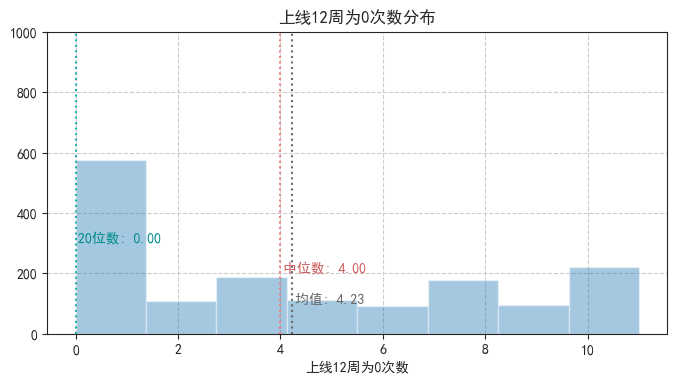

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("ticks")   # 风格选择包括："white", "dark", "whitegrid", "darkgrid", "ticks"
sns.set_style({'font.sans-serif': ['SimHei', 'Calibri']})  #设置中文设定

bfw = 0.20
smean = np.mean(cs)
squantile1 = np.quantile(cs,0.5)
squantile = np.quantile(cs,bfw)


plt.figure(figsize=(8,4),dpi=100)  #通过dpi参数指定图像的分辨率
sns.distplot(cs, hist=True, kde=False, rug=False,   #选择是否显示条形图、密度曲线、观测的小细条（边际毛毯）
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  #设置选择True的条件(其密度曲线颜色、线宽、线形)
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,}, label='后期月均占比')

plt.axvline(smean, color='DimGray', linestyle=":", alpha=2)
plt.text(smean+0.05,100, '均值: %.2f' %(smean), color = 'DimGray')

plt.axvline(squantile1, color='lightcoral', linestyle=":", alpha=2)
plt.text(squantile1+0.05,200, '中位数: %.2f' %(squantile1), color = 'indianred')

plt.axvline(squantile, color='lightseagreen', linestyle=":", alpha=2)
plt.text(squantile+0.05,300, '%.f位数: %.2f' %(bfw*100,squantile), color = 'darkcyan')


# 设置图表其他内容
plt.ylim([0,1000])
plt.grid(linestyle='--')
plt.title(("上线12周为0次数分布"))

In [120]:
data_x2 = data_x[(data_x['上线12周为0次数']!=12) & (data_x['上线12周为0次数']!= 0) & (data_x['开始预警周']!= 'begin')].copy()

In [122]:
data_x2['开始预警周'] = data_x2['开始预警周'].str[4:]

In [123]:
data_x2['开始预警周'] = data_x2['开始预警周'].astype('int')

In [106]:
data_x2

,受票方,首次支付日期,weekday,2019-03-04,2019-03-11,2019-03-18,2019-03-25,2019-04-01,2019-04-08,2019-04-15,2019-04-22,2019-04-29,2019-05-06,2019-05-13,2019-05-20,2019-05-27,2019-06-03,2019-06-10,2019-06-17,2019-06-24,2019-07-01,2019-07-08,2019-07-15,2019-07-22,2019-07-29,2019-08-05,2019-08-12,2019-08-19,2019-08-26,2019-09-02,2019-09-09,2019-09-16,2019-09-23,2019-09-30,2019-10-07,2019-10-14,2019-10-21,2019-10-28,2019-11-04,2019-11-11,2019-11-18,2019-11-25,2019-12-02,2019-12-09,2019-12-16,2019-12-23,2019-12-30,2020-01-06,2020-01-13,2020-01-20,2020-01-27,2020-02-03,2020-02-10,2020-02-17,2020-02-24,2020-03-02,2020-03-09,2020-03-16,2020-03-23,2020-03-30,2020-04-06,2020-04-13,2020-04-20,2020-04-27,2020-05-04,2020-05-11,2020-05-18,2020-05-25,首次支付后周一,week0,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,上线12周为0次数,0周占比,开始预警周
0,七台河市速达快递有限公司,2019-05-23,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57777.72,62222.16,35555.52,53333.28,57777.72,26666.64,44444.40,53333.28,44444.40,26666.64,53333.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,8888.88,44444.40,4867.72,48253.92,0.00,73015.80,9735.44,63280.36,38941.76,77883.52,68148.08,68148.08,38941.76,77883.52,0.00,0.0,0.00,0.0,0.00,0.00,0.00,29206.32,0.00,58412.64,77883.52,82751.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-05-27,62222.16,35555.52,53333.28,57777.72,26666.64,44444.40,53333.28,44444.40,26666.64,53333.28,0.00,0.00,0.00,2,0.166667,10
1,万里扬州物流有限公司,2019-06-12,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2553.19,8936.17,5319.15,14468.09,0.00,2340.43,0.00,2446.81,106.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-06-17,14468.09,0.00,2340.43,0.00,2446.81,106.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8,0.666667,6
2,三明鑫旭达物流有限公司,2019-11-22,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,8483.57,6256.63,5302.24,3181.35,4241.80,3817.60,2863.21,6362.68,6256.63,2120.89,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2120.90,4878.06,1060.45,9544.05,9756.12,3181.35,5090.15,2019-11-25,5302.24,3181.35,4241.80,3817.60,2863.21,6362.68,6256.63,2120.89,0.00,0.00,0.00,0.00,0.00,4,0.333333,8
4,三门峡市兆成物资贸易有限公司,2019-08-30,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13587.31,413693.16,2546751.34,3287470.90,477439.16,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-09-02,413693.16,2546751.34,3287470.90,477439.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8,0.666667,4
5,三门峡市炬达商贸有限公司,2019-11-12,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,27932.97,134322.36,56128.73,68508.49,34645.75,52368.10,61948.94,169409.58,337614.90,39765.96,194095.73,0.0,0.00,0.0,0.00,0.00,295231.06,504543.37,264770.29,302860.51,365573.22,259130.58,358443.72,466579.60,515472.40,465800.40,537377.81,152870.90,219765.09,144252.91,2019-11-18,56128.73,68508.49,34645.75,52368.10,61948.94,169409.58,337614.90,39765.96,194095.73,0.00,0.00,0.00,0.00,3,0.250000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,黑龙江省辽金西货物运输有限公司,2019-07-23,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17989.43,15873.03,0.00,10582.02,15873.03,10582.02,10582.02,6445.96,4740.93,8005.76,8403.42,

In [139]:
def lcs(x):
    z = (x[:int(x[15])]==0).sum()
    return z

In [133]:
data_x2[data_x2.columns[69:]].values[0][15]

10.0

In [138]:
((data_x2[data_x2.columns[69:]].values[0])[:int(data_x2[data_x2.columns[69:]].values[0][15])]==0).sum()

0

In [132]:
data_x2[data_x2.columns[69:]]

,week0,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,上线12周为0次数,0周占比,开始预警周
0,62222.16,35555.52,53333.28,57777.72,26666.64,44444.40,53333.28,44444.40,26666.64,53333.28,0.00,0.00,0.00,2,0.166667,10
1,14468.09,0.00,2340.43,0.00,2446.81,106.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8,0.666667,6
2,5302.24,3181.35,4241.80,3817.60,2863.21,6362.68,6256.63,2120.89,0.00,0.00,0.00,0.00,0.00,4,0.333333,8
4,413693.16,2546751.34,3287470.90,477439.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8,0.666667,4
5,56128.73,68508.49,34645.75,52368.10,61948.94,169409.58,337614.90,39765.96,194095.73,0.00,0.00,0.00,0.00,3,0.250000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,0.00,5820.11,0.00,0.00,8042.33,0.00,0.00,2645.50,14021.17,0.00,0.00,7619.05,0.00,7,0.583333,12
1749,0.00,10582.02,15873.03,10582.02,10582.02,6445.96,4740.93,8005.76,8403.42,0.00,0.00,0.00,0.00,4,0.333333,9
1750,0.00,39047.63,0.00,0.00,0.00,208148.12,30158.74,0.00,16402.12,9629.63,0.00,0.00,13439.15,7,0.583333,10
1752,211640.20,352380.94,115343.91,101587.29,0.00,101587.29,434920.65,111111.12,33862.43,298412.72,111111.12,494179.90,650793.64,1,0.083333,4


In [140]:
data_x2['异常前0次数'] = data_x2[data_x2.columns[69:]].apply(lcs,axis=1)

KeyError: 15

In [71]:
data_x[data_x['week12']>0]['0周占比'].describe()

count    858.000000
mean       0.178710
std        0.246722
min        0.000000
25%        0.000000
50%        0.083333
75%        0.333333
max        1.000000
Name: 0周占比, dtype: float64

In [64]:
data_x[data_x['week12']>0]['上线12周为0次数'].sum()

1840

In [65]:
len(data_x[data_x['week12']>0])*12

10296

In [66]:
10296/12

858.0

In [226]:
data_x['week3/前三周均值'] = data_x['week3']/data_x[['week0','week1','week2']].mean(axis=1)

In [ ]:
& (data_x['week1']==0)

In [291]:
len(data_x[(data_x['week0']>0) & (data_x['week1']==0)])/len(data_x[(data_x['week0']>0)])

0.1486590038314176

In [296]:
data_x[(data_x['week3/前三周均值']<0.3)]

,受票方,首次支付日期,weekday,2019-03-04,2019-03-11,2019-03-18,2019-03-25,2019-04-01,2019-04-08,2019-04-15,2019-04-22,2019-04-29,2019-05-06,2019-05-13,2019-05-20,2019-05-27,2019-06-03,2019-06-10,2019-06-17,2019-06-24,2019-07-01,2019-07-08,2019-07-15,2019-07-22,2019-07-29,2019-08-05,2019-08-12,2019-08-19,2019-08-26,2019-09-02,2019-09-09,2019-09-16,2019-09-23,2019-09-30,2019-10-07,2019-10-14,2019-10-21,2019-10-28,2019-11-04,2019-11-11,2019-11-18,2019-11-25,2019-12-02,2019-12-09,2019-12-16,2019-12-23,2019-12-30,2020-01-06,2020-01-13,2020-01-20,2020-01-27,2020-02-03,2020-02-10,2020-02-17,2020-02-24,2020-03-02,2020-03-09,2020-03-16,2020-03-23,2020-03-30,2020-04-06,2020-04-13,2020-04-20,2020-04-27,2020-05-04,2020-05-11,2020-05-18,2020-05-25,首次支付后周一,week0,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,week3/前三周均值
1,万里扬州物流有限公司,2019-06-12,2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2553.19,8936.17,5319.15,14468.09,0.00,2340.43,0.00,2446.81,106.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-06-17,14468.09,0.00,2340.43,0.00,2446.81,106.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
4,三门峡市兆成物资贸易有限公司,2019-08-30,4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13587.31,413693.16,2546751.34,3287470.90,477439.16,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-09-02,413693.16,2546751.34,3287470.90,477439.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.229247
6,三门峡智翔商贸有限公司,2019-05-28,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,152793.65,82666.65,586095.23,74582.01,0.00,76701.57,27703.71,0.00,0.00,139206.33,111735.46,3735.45,0.00,0.00,0.00,318268.17,2129155.05,3186752.69,41375.66,69915.34,256448.70,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-06-03,0.00,76701.57,27703.71,0.00,0.00,139206.33,111735.46,3735.45,0.00,0.00,0.00,318268.17,2129155.05,0.000000
7,三门峡浩泰新材料科技有限公司,2019-11-24,6,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,21403.06,50942.33,4988.55,0.00,4970.76,30097.21,60972.57,0.00,12074.99,0.00,0.00,0.00,0.00,0.00,0.00,8963.55,0.00,7752.96,7402.84,7935.37,3714.83,3836.01,3710.17,4862.29,0.00,0.00,5042.37,0.00,2019-11-25,50942.33,4988.55,0.00,4970.76,30097.21,60972.57,0.00,12074.99,0.00,0.00,0.00,0.00,0.00,0.266620
8,三门峡聚福新材料科技有限公司,2019-11-08,4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,5205.50,94011.16,189231.51,63380.33,109181.48,19431.33,176054.50,425465.39,169021.14,55357.16,6471.08,35688.55,16869.48,0.00,0.00,37503.46,158437.69,505280.94,305479.70,132099.55,157392.02,46140.63,69847.93,54224.67,53553.97,66882.94,285083.02,192060.99,86705.71,51878.78,119664.97,2019-11-11,189231.51,63380.33,109181.48,19431.33,176054.50,425465.39,169021.14,55357.16,6471.08,35688.55,16869.48,0.00,0.00,0.161125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,黄冈优然牧业有限责任公司武穴分公司,2019-05-13,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,39857.64,11234.71,18982.38,61267.30,0.00,0.00,0.00,52633.16,0.00,28758.48,14402.54,33756.78,46837.17,18545.02,14312.92,20343.01,0.00,17257.63,8290.68,22198.09,0.00,41226.90,

In [300]:
len(data_x[(data_x['week3/前三周均值']<0.3) &(data_x['week3/前三周均值']>0)])/len(data_x[(data_x[['week0','week1','week2']].sum(axis=1)>0)])

0.07692307692307693

In [293]:
len(data_x[(data_x['week1']>0) & (data_x['week2']==0)])/len(data_x[(data_x['week1']>0)])

0.14390243902439023

In [303]:
data_x[(data_x[['week0','week1','week2']].sum(axis=1)>0) & (data_x['week3']==0)]

,受票方,首次支付日期,weekday,2019-03-04,2019-03-11,2019-03-18,2019-03-25,2019-04-01,2019-04-08,2019-04-15,2019-04-22,2019-04-29,2019-05-06,2019-05-13,2019-05-20,2019-05-27,2019-06-03,2019-06-10,2019-06-17,2019-06-24,2019-07-01,2019-07-08,2019-07-15,2019-07-22,2019-07-29,2019-08-05,2019-08-12,2019-08-19,2019-08-26,2019-09-02,2019-09-09,2019-09-16,2019-09-23,2019-09-30,2019-10-07,2019-10-14,2019-10-21,2019-10-28,2019-11-04,2019-11-11,2019-11-18,2019-11-25,2019-12-02,2019-12-09,2019-12-16,2019-12-23,2019-12-30,2020-01-06,2020-01-13,2020-01-20,2020-01-27,2020-02-03,2020-02-10,2020-02-17,2020-02-24,2020-03-02,2020-03-09,2020-03-16,2020-03-23,2020-03-30,2020-04-06,2020-04-13,2020-04-20,2020-04-27,2020-05-04,2020-05-11,2020-05-18,2020-05-25,首次支付后周一,week0,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,week3/前三周均值
1,万里扬州物流有限公司,2019-06-12,2,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2553.19,8936.17,5319.15,14468.09,0.00,2340.43,0.00,2446.81,106.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-06-17,14468.09,0.00,2340.43,0.0,2446.81,106.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
6,三门峡智翔商贸有限公司,2019-05-28,1,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,152793.65,82666.65,586095.23,74582.01,0.00,76701.57,27703.71,0.00,0.00,139206.33,111735.46,3735.45,0.00,0.00,0.00,318268.17,2129155.05,3186752.69,41375.66,69915.34,256448.70,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-06-03,0.00,76701.57,27703.71,0.0,0.00,139206.33,111735.46,3735.45,0.00,0.00,0.00,318268.17,2129155.05,0.0
10,上栗县金源矿业有限公司,2019-06-21,4,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,187400.00,253660.00,0.00,6750.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-06-24,253660.00,0.00,6750.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
16,上海云量子国际物流有限公司,2019-05-16,3,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,7941.61,4777.07,530.79,1592.36,0.00,3184.71,7061.04,0.00,1486.20,2653.93,1592.36,0.00,0.00,0.00,1698.52,424.63,5520.17,2123.14,0.00,2123.14,2972.40,10084.92,2123.14,0.0,6369.43,2123.14,4246.28,5838.66,2653.93,2653.93,849.26,1061.57,0.00,9660.31,11889.61,8492.57,2653.93,0.0,0.00,0.00,0.00,0.00,11783.43,7430.98,7537.14,7643.30,0.00,3397.01,2547.76,1910.82,2760.08,4723.98,11146.50,11040.34,1804.67,2019-05-20,4777.07,530.79,1592.36,0.0,3184.71,7061.04,0.00,1486.20,2653.93,1592.36,0.00,0.00,0.00,0.0
17,上海众拓运输有限公司,2019-04-15,0,0.0,0.0,0.0,0.0,0.0,7505.29,12579.28,5338.27,0.00,0.00,0.00,0.00,0.00,143562.15,209264.26,254079.06,195644.81,301506.33,177672.91,385276.91,381595.95,429163.98,365969.26,527460.43,381440.58,499596.79,494851.98,368584.57,577889.78,408908.87,29733.19,48274.84,0.00,0.0,0.00,0.00,0.00,68181.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-04-22,5338.27,0.00,0.00,0.0,0.00,0.00,143562.15,209264.26,254079.06,195644.81,301506.33,177672.91,385276.91,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,鸿达建设有限公司,2019-12-10,1,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,136084.69,176296.34,39153.45,0.00,0.00,0.

In [301]:
len(data_x[(data_x['week3']==0)])/len(data_x[(data_x[['week0','week1','week2']].sum(axis=1)>0)])

0.460857726344452

In [295]:
len(data_x[(data_x['week3']>0) & (data_x['week4']==0)])/len(data_x[(data_x['week3']>0)])

0.14272474513438368

In [234]:
x = []
for i in range(11):
    z = data_x[data_x.columns[i+72]]/data_x[data_x.columns[i+69:i+72]].mean(axis=1)
    x.append(z)


In [236]:
xx = pd.concat(x)

In [242]:
xx.describe()

count    1.376700e+04
mean              inf
std               NaN
min      0.000000e+00
25%      2.623825e-06
50%      7.357774e-01
75%      1.450054e+00
max               inf
dtype: float64

In [287]:
xxx = xx[(xx.notnull())& (xx!= float('inf'))& (xx<2)].copy()

In [288]:
np.std(xxx)

0.5817460143073366

Text(0.5, 1.0, "新上线客户每周与前三周建单额均值之比'0<-<2'分布(标准差0.53)")

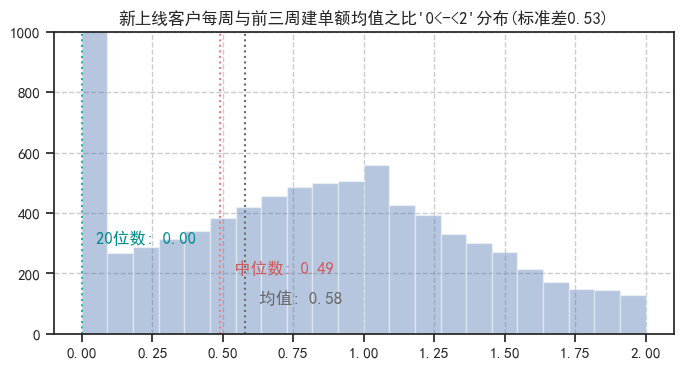

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("ticks")   # 风格选择包括："white", "dark", "whitegrid", "darkgrid", "ticks"
sns.set_style({'font.sans-serif': ['SimHei', 'Calibri']})  #设置中文设定

bfw = 0.20
smean = np.mean(xxx)
squantile1 = np.quantile(xxx,0.5)
squantile = np.quantile(xxx,bfw)
bzc = np.std(xxx)

plt.figure(figsize=(8,4),dpi=100)  #通过dpi参数指定图像的分辨率
sns.distplot(xxx, hist=True, kde=False, rug=False,   #选择是否显示条形图、密度曲线、观测的小细条（边际毛毯）
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  #设置选择True的条件(其密度曲线颜色、线宽、线形)
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,}, label='后期月均占比')

plt.axvline(smean, color='DimGray', linestyle=":", alpha=2)
plt.text(smean+0.05,100, '均值: %.2f' %(smean), color = 'DimGray')

plt.axvline(squantile1, color='lightcoral', linestyle=":", alpha=2)
plt.text(squantile1+0.05,200, '中位数: %.2f' %(squantile1), color = 'indianred')

plt.axvline(squantile, color='lightseagreen', linestyle=":", alpha=2)
plt.text(squantile+0.05,300, '%.f位数: %.2f' %(bfw*100,squantile), color = 'darkcyan')


# 设置图表其他内容
plt.ylim([0,1000])
plt.grid(linestyle='--')
plt.title(("新上线客户每周与前三周建单额均值之比'0<-<2'分布(标准差0.53)"))

In [229]:
data_x.columns[72]

'week3'

In [192]:
data_y = data_x[data_x['week12']==0].copy()

In [193]:
data_y['前四周变异程度'] = data_y.iloc[:,69:73].std(axis=1,ddof=0)/data_y.iloc[:,69:73].mean(axis=1)

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
data_y.shape

(898, 83)

In [196]:
data_y['前四周变异程度'].describe()

count    684.000000
mean       0.936881
std        0.521018
min        0.061328
25%        0.496697
50%        0.889489
75%        1.348335
max        1.732051
Name: 前四周变异程度, dtype: float64

In [197]:
qs = data_y[data_y['前四周变异程度'].notnull()]['前四周变异程度']
len(qs)

684

Text(0.5, 1.0, '新上线客户前四周建单额变异程度')

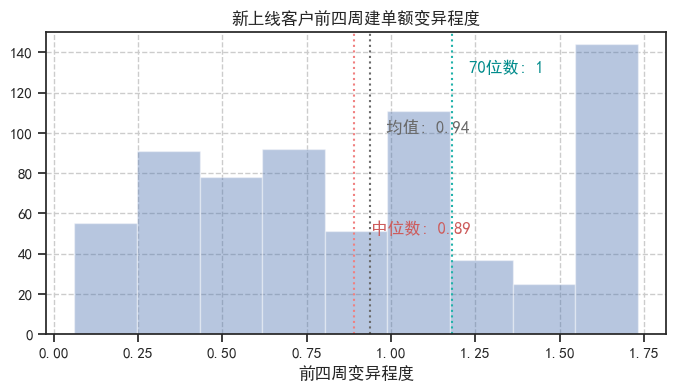

In [198]:
sns.set_style("ticks")   # 风格选择包括："white", "dark", "whitegrid", "darkgrid", "ticks"
sns.set_style({'font.sans-serif': ['SimHei', 'Calibri']})  #设置中文设定

bfw = 0.7
smean = np.mean(qs)
squantile1 = np.quantile(qs,0.5)
squantile = np.quantile(qs,bfw)

plt.figure(figsize=(8,4),dpi=100)  #通过dpi参数指定图像的分辨率
sns.distplot(qs, hist=True, kde=False, rug=False,   #选择是否显示条形图、密度曲线、观测的小细条（边际毛毯）
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  #设置选择True的条件(其密度曲线颜色、线宽、线形)
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,}, label='后期月均占比')

plt.axvline(smean, color='DimGray', linestyle=":", alpha=2)
plt.text(smean+0.05,100, '均值: %.2f' %(smean), color = 'DimGray')

plt.axvline(squantile1, color='lightcoral', linestyle=":", alpha=2)
plt.text(squantile1+0.05,50, '中位数: %.2f' %(squantile1), color = 'indianred')

plt.axvline(squantile, color='lightseagreen', linestyle=":", alpha=2)
plt.text(squantile+0.05,130, '%.f位数: %.0f' %(bfw*100,squantile), color = 'darkcyan')

# 设置图表其他内容
plt.ylim([0,150])
plt.grid(linestyle='--')
plt.title(("新上线客户前四周建单额变异程度"))

In [199]:
data_y['前八周变异程度'] = data_y.iloc[:,69:77].std(axis=1,ddof=0)/data_y.iloc[:,69:77].mean(axis=1)

In [200]:
qb = data_y[data_y['前八周变异程度'].notnull()]['前八周变异程度']

Text(0.5, 1.0, '新上线客户前八周建单额变异程度')

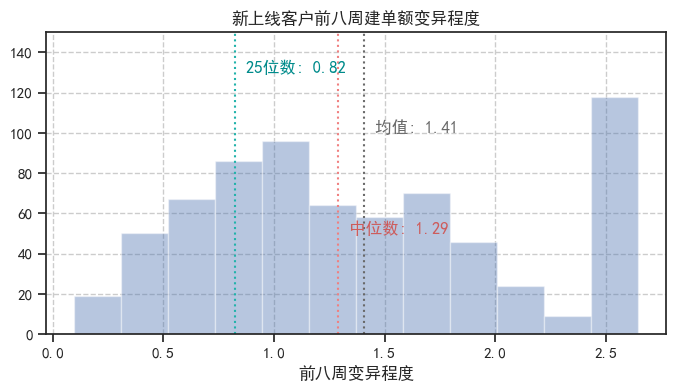

In [207]:
sns.set_style("ticks")   # 风格选择包括："white", "dark", "whitegrid", "darkgrid", "ticks"
sns.set_style({'font.sans-serif': ['SimHei', 'Calibri']})  #设置中文设定

bfw = 0.25
smean = np.mean(qb)
squantile1 = np.quantile(qb,0.5)
squantile = np.quantile(qb,bfw)

plt.figure(figsize=(8,4),dpi=100)  #通过dpi参数指定图像的分辨率
sns.distplot(qb, hist=True, kde=False, rug=False,   #选择是否显示条形图、密度曲线、观测的小细条（边际毛毯）
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  #设置选择True的条件(其密度曲线颜色、线宽、线形)
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,}, label='后期月均占比')

plt.axvline(smean, color='DimGray', linestyle=":", alpha=2)
plt.text(smean+0.05,100, '均值: %.2f' %(smean), color = 'DimGray')

plt.axvline(squantile1, color='lightcoral', linestyle=":", alpha=2)
plt.text(squantile1+0.05,50, '中位数: %.2f' %(squantile1), color = 'indianred')

plt.axvline(squantile, color='lightseagreen', linestyle=":", alpha=2)
plt.text(squantile+0.05,130, '%.f位数: %.02f' %(bfw*100,squantile), color = 'darkcyan')

# 设置图表其他内容
plt.ylim([0,150])
plt.grid(linestyle='--')
plt.title(("新上线客户前八周建单额变异程度"))

In [202]:
data_y['前十三周变异程度'] = data_y.iloc[:,69:83].std(axis=1,ddof=0)/data_y.iloc[:,69:83].mean(axis=1)

In [203]:
qss = data_y[data_y['前十三周变异程度'].notnull()]['前十三周变异程度']

Text(0.5, 1.0, '新上线客户前十三周建单额变异程度')

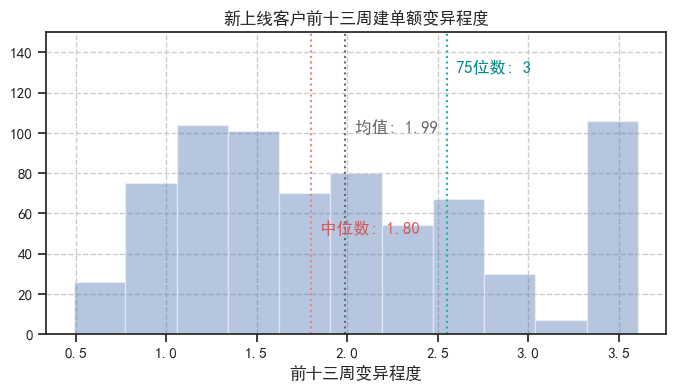

In [204]:
sns.set_style("ticks")   # 风格选择包括："white", "dark", "whitegrid", "darkgrid", "ticks"
sns.set_style({'font.sans-serif': ['SimHei', 'Calibri']})  #设置中文设定

bfw = 0.75
smean = np.mean(qss)
squantile1 = np.quantile(qss,0.5)
squantile = np.quantile(qss,bfw)

plt.figure(figsize=(8,4),dpi=100)  #通过dpi参数指定图像的分辨率
sns.distplot(qss, hist=True, kde=False, rug=False,   #选择是否显示条形图、密度曲线、观测的小细条（边际毛毯）
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  #设置选择True的条件(其密度曲线颜色、线宽、线形)
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,}, label='后期月均占比')

plt.axvline(smean, color='DimGray', linestyle=":", alpha=2)
plt.text(smean+0.05,100, '均值: %.2f' %(smean), color = 'DimGray')

plt.axvline(squantile1, color='lightcoral', linestyle=":", alpha=2)
plt.text(squantile1+0.05,50, '中位数: %.2f' %(squantile1), color = 'indianred')

plt.axvline(squantile, color='lightseagreen', linestyle=":", alpha=2)
plt.text(squantile+0.05,130, '%.f位数: %.0f' %(bfw*100,squantile), color = 'darkcyan')

# 设置图表其他内容
plt.ylim([0,150])
plt.grid(linestyle='--')
plt.title(("新上线客户前十三周建单额变异程度"))